# MULTIVARIATE TIME SERIES MODEL FOR ATM WITHDRAWAL

The use of Automated Teller Machines (ATMs) has become increasingly popular throughout the world due to the widespread adoption of electronic financial transactions and better access to financial services in many countries. As the network of ATMs is becoming denser while the users are accessing them at a greater rate, the current financial institutions are faced with addressing inventory and replenishment optimal policies when managing a large number of ATMs. As the numbers of ATM machine increases over time, it is very hard for the replenishment management and it need some technologies to help in forecast the ATM machine withdrawal amount.

## Load Data and Transform Data

In [1]:
import pandas as pd

In [2]:
# Load data
df01 =  pd.read_csv("cleansed_date01.csv")
pd.options.display.max_columns = None

In [3]:
# Convert Transaction Date into Date form
df01['Transaction Date'] = pd.to_datetime(df01['Transaction Date'], infer_datetime_format=True)

In [4]:
df01.rename(columns={'Transaction Date':'Transaction_Date'}, inplace=True)

In [5]:
# Transnform date into index
data = df01.drop(['Transaction_Date'], axis=1)
data.index = df01.Transaction_Date

### Select particular ATM machine

The reason of choosing the particular ATM machine is to seperate the model as per ATM machine. It will be more understandable and logical as the model is only describe for one particular ATM machine.

In [45]:
# Only select the ATM 1 which is one of the ATM machine 
data01 = data[(data["ATM Name"]=="Big Street ATM")]

The model require the data in the order form, so it can understand the flow of the data in time series manner. 

In [46]:
data01 = data01.drop('ATM Name', 1)

In [47]:
data01["Weekday"] = data01["Weekday"].replace({"Saturday": "SATURDAY"})
data01["Weekday"] = data01["Weekday"].replace({"Monday": "MONDAY"})
data01["Weekday"] = data01["Weekday"].replace({"Tuesday": "TUESDAY"})
data01["Weekday"] = data01["Weekday"].replace({"Wednesday": "WEDNESDAY"})
data01["Weekday"] = data01["Weekday"].replace({"Thursday": "THURSDAY"})
data01["Weekday"] = data01["Weekday"].replace({"Friday": "FRIDAY"})
data01["Weekday"] = data01["Weekday"].replace({"Sunday": "SUNDAY"})

In [48]:
data01["Weekday"].value_counts()

SUNDAY       549
SATURDAY     334
TUESDAY      305
MONDAY       295
WEDNESDAY    294
THURSDAY     289
FRIDAY       288
Name: Weekday, dtype: int64

In [49]:
# Sorting by date
data01 = data01.sort_index()

In [50]:
data01

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,
2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,H,WHH
2011-01-02,17,5,12,52800,20900,31900,SUNDAY,NH,H,HHW
2011-01-03,24,21,3,88100,77100,11000,MONDAY,NH,W,WWW
2011-01-04,34,12,22,101600,51200,50400,TUESDAY,NH,W,WWW
2011-01-05,30,14,16,98000,52700,45300,WEDNESDAY,NH,W,WWW
...,...,...,...,...,...,...,...,...,...,...
2017-09-25,122,41,81,513800,283000,230800,MONDAY,NH,W,HWW
2017-09-26,131,36,95,437400,162700,274700,TUESDAY,NH,W,WWW
2017-09-27,130,40,90,511200,215000,296200,WEDNESDAY,NH,W,WWW


In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [52]:
data01['Weekday'] = le.fit_transform(data01['Weekday'])

In [53]:
data01['Festival Religion'] = le.fit_transform(data01['Festival Religion'])

In [54]:
data01['Working Day'] = le.fit_transform(data01['Working Day'])

In [55]:
data01['Holiday Sequence'] = le.fit_transform(data01['Holiday Sequence'])

### Convert data format to float

The model require the data need to be in float format, so the data able to fit into the certain.

In [56]:
import numpy as np

In [57]:
# convert all date into float as VARMAX only can accept this datatype
data01 = data01.astype(np.float64)

In [58]:
data01.dtypes[:]

No Of Withdrawals               float64
No Of XYZ Card Withdrawals      float64
No Of Other Card Withdrawals    float64
Total amount Withdrawn          float64
Amount withdrawn XYZ Card       float64
Amount withdrawn Other Card     float64
Weekday                         float64
Festival Religion               float64
Working Day                     float64
Holiday Sequence                float64
dtype: object

In [59]:
data01

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,
2011-01-01,50.0,20.0,30.0,123800.0,41700.0,82100.0,2.0,1.0,0.0,4.0
2011-01-02,17.0,5.0,12.0,52800.0,20900.0,31900.0,3.0,4.0,0.0,1.0
2011-01-03,24.0,21.0,3.0,88100.0,77100.0,11000.0,1.0,4.0,1.0,7.0
2011-01-04,34.0,12.0,22.0,101600.0,51200.0,50400.0,5.0,4.0,1.0,7.0
2011-01-05,30.0,14.0,16.0,98000.0,52700.0,45300.0,6.0,4.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...
2017-09-25,122.0,41.0,81.0,513800.0,283000.0,230800.0,1.0,4.0,1.0,3.0
2017-09-26,131.0,36.0,95.0,437400.0,162700.0,274700.0,5.0,4.0,1.0,7.0
2017-09-27,130.0,40.0,90.0,511200.0,215000.0,296200.0,6.0,4.0,1.0,7.0


In [72]:
data01["Total amount Withdrawn"].describe()

count      2354.000000
mean     308589.422260
std      157378.707303
min         200.000000
25%      175500.000000
50%      315250.000000
75%      420375.000000
max      926100.000000
Name: Total amount Withdrawn, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
columns_to_category = ['Total amount Withdrawn','Weekday', 'Festival Religion', 'Working Day', 'Holiday Sequence','Amount withdrawn XYZ Card']
data01[columns_to_category] = scaler.fit_transform(data01[columns_to_category])

## Separate data into train and test

It separate data into train and test for training and testing the model.

In [60]:
# Seperate for train data for building the model
begin = pd.Timestamp('2011-01-01')
end = pd.Timestamp('2016-03-31')

train = data01.truncate(before=begin, after=end)

In [61]:
# Seperate it for test data for testing the model
begin = pd.Timestamp('2016-04-01')
end = pd.Timestamp('2017-12-31')

test = data01.truncate(before=begin, after=end)

In [62]:
train

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,
2011-01-01,50.0,20.0,30.0,123800.0,41700.0,82100.0,2.0,1.0,0.0,4.0
2011-01-02,17.0,5.0,12.0,52800.0,20900.0,31900.0,3.0,4.0,0.0,1.0
2011-01-03,24.0,21.0,3.0,88100.0,77100.0,11000.0,1.0,4.0,1.0,7.0
2011-01-04,34.0,12.0,22.0,101600.0,51200.0,50400.0,5.0,4.0,1.0,7.0
2011-01-05,30.0,14.0,16.0,98000.0,52700.0,45300.0,6.0,4.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...
2016-03-26,124.0,32.0,92.0,384700.0,143100.0,241600.0,2.0,4.0,0.0,0.0
2016-03-27,105.0,31.0,74.0,240300.0,84900.0,155400.0,3.0,4.0,0.0,1.0
2016-03-28,55.0,16.0,39.0,173100.0,75900.0,97200.0,1.0,4.0,1.0,3.0


In [63]:
test

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,
2016-04-02,35.0,7.0,28.0,129900.0,7900.0,122000.0,2.0,4.0,0.0,4.0
2016-04-03,90.0,26.0,64.0,391200.0,154300.0,236900.0,3.0,4.0,0.0,1.0
2016-04-04,111.0,29.0,82.0,480600.0,129600.0,351000.0,1.0,4.0,1.0,3.0
2016-04-05,121.0,29.0,92.0,487100.0,139300.0,347800.0,5.0,4.0,1.0,7.0
2016-04-06,134.0,47.0,87.0,574500.0,284100.0,290400.0,6.0,4.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...
2017-09-25,122.0,41.0,81.0,513800.0,283000.0,230800.0,1.0,4.0,1.0,3.0
2017-09-26,131.0,36.0,95.0,437400.0,162700.0,274700.0,5.0,4.0,1.0,7.0
2017-09-27,130.0,40.0,90.0,511200.0,215000.0,296200.0,6.0,4.0,1.0,7.0


## Building on model

Given a multivariate time series, the VARMAX procedure estimates the model parameters and generates forecasts associated with vector autoregressive moving-average processes with exogenous regressors (VARMAX) models. Often, economic or financial variables are not only contemporaneously correlated to each other, they are also correlated to each other's past values. The VARMAX procedure can be used to model these types of time relationships. In many economic and financial applications, the variables of interest (dependent, response, or endogenous variables) are influenced by variables external to the system under consideration (independent, input, predictor, regressor, or exogenous variables). The VARMAX procedure enables you to model the dynamic relationship both between the dependent variables and also between the dependent and independent variables.

VARMAX models are defined in terms of the orders of the autoregressive or moving-average process (or both). When you use the VARMAX procedure, these orders can be specified by options or they can be automatically determined. Criteria for automatically determining these orders include the following:

- Akaike's information criterion (AIC)
- Schwarz Bayesian criterion (SBC), also known as Bayesian information criterion (BIC)

In [64]:
import statsmodels.api as sm

Start building the model by choosing the right parameters and variables to train the model.

In [65]:
#Building the model
exog = train[['Weekday','Festival Religion','Working Day','Holiday Sequence']]
model= sm.tsa.VARMAX(train[['Total amount Withdrawn','Amount withdrawn XYZ Card']], order=(10,0), trend='nc', exog=exog)
model_result = model.fit(maxiter=1000, disp=False)

C:\Users\LENOVO\Anaconda3\envs\sam\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [66]:
# Showing the model result summary
model_result.summary()

Dep. Variable:,"['Total amount Withdrawn', 'Amount withdrawn XYZ Card']",No. Observations:,1891
Model:,VARX(10),Log Likelihood,-47001.032
Date:,"Fri, 27 Sep 2019",AIC,94104.064
Time:,14:51:13,BIC,94386.852
Sample:,0,HQIC,94208.192
,- 1891,,
Covariance Type:,opg,,
Ljung-Box (Q):,"61.52, 65.19",Jarque-Bera (JB):,"303.44, 105.09"
Prob(Q):,"0.02, 0.01",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"3.93, 2.43",Skew:,"0.29, 0.05"
Prob(H) (two-sided):,"0.00, 0.00",Kurtosis:,"4.87, 4.15"


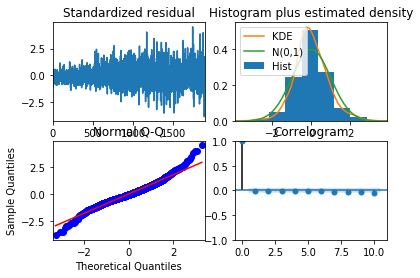

In [67]:
#plot the result of the model
fig2 = model_result.plot_diagnostics()

In [32]:
import matplotlib.pyplot as plt

In [33]:
plt.show(fig2)

## Make prediction

To make the forecast with the provided features and the correct steps ahead which matched with the provided features.

In [68]:
#using the features of the test data to forecast
test01 = test[['Weekday','Festival Religion','Working Day','Holiday Sequence']]

In [69]:
# Forecasting by using the test data features
exog = test01
pred = model_result.get_forecast(steps=463,exog=exog)
pred_ci = pred.conf_int()

C:\Users\LENOVO\Anaconda3\envs\sam\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [37]:
# forecasted upper bound and lower bound
pred_ci

,lower Total amount Withdrawn,lower Amount withdrawn XYZ Card,upper Total amount Withdrawn,upper Amount withdrawn XYZ Card
1891,0.172997,0.074544,0.578801,0.526160
1892,0.106082,0.017816,0.536744,0.477134
1893,0.091441,0.014253,0.530116,0.474195
1894,0.084019,0.024627,0.530958,0.487062
1895,0.093015,0.031479,0.546676,0.496593
...,...,...,...,...
2349,0.033035,0.016350,0.632256,0.557527
2350,0.056327,0.044371,0.655548,0.585547
2351,0.060544,0.046622,0.659765,0.587798
2352,0.052168,0.036041,0.651388,0.577218


In [38]:
#forecasted mean result
pred.predicted_mean

,Total amount Withdrawn,Amount withdrawn XYZ Card
1891,0.375899,0.300352
1892,0.321413,0.247475
1893,0.310778,0.244224
1894,0.307488,0.255845
1895,0.319845,0.264036
...,...,...
2349,0.332645,0.286938
2350,0.355938,0.314959
2351,0.360155,0.317210
2352,0.351778,0.306629


In [43]:
pred_m = pred.predicted_mean

## Checking on the accuracy

For the Total Average Percentage Over Truth Value, it can calculate the sum of difference between truth value with the predicted value and divide it with the total amount of truth value. It can find out the percentage of the total error over the truth value. It can find out the percentage of total error amount over the truth value.

In [39]:
y_forecasted = pred.predicted_mean
y_truth = test.tail(463)

# Compute the average error
mse = (y_forecasted["Total amount Withdrawn"].values - y_truth["Total amount Withdrawn"].values).mean()
print('The Average Error of our forecasts is {}'.format(round(mse, 2)))

The Average Error of our forecasts is -0.04


In [41]:
y_forecasted = pred.predicted_mean
y_truth = test.tail(463)

# Compute the average error
mse = ((y_forecasted["Total amount Withdrawn"].values - y_truth["Total amount Withdrawn"].values)**2).mean()
print('The Mean square error of our forecasts is {}'.format(round(mse, 6)))

The Mean square error of our forecasts is 0.033669


In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted["Total amount Withdrawn"], y_truth["Total amount Withdrawn"])
sqrt(mse)

0.18349105099049245

In [87]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(((y_true - y_pred) / y_true)) * 100)

In [90]:
mean_absolute_percentage_error(y_truth["Total amount Withdrawn"], y_forecasted["Total amount Withdrawn_Predict"])

C:\Users\LENOVO\Anaconda3\envs\sam\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


inf

In [91]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [93]:
print(smape(y_truth["Total amount Withdrawn"],y_forecasted["Total amount Withdrawn_Predict"]))

45.38950325595935


In [28]:
y_forecasted

,Total amount Withdrawn,Amount withdrawn XYZ Card
1885,306143.140592,134809.681315
1886,265264.425047,119920.169091
1887,300952.312397,144287.652599
1888,275018.216511,130080.129120
1889,305579.452024,142258.430641
...,...,...
2349,316814.983511,149368.981767
2350,309381.017511,143790.878451
2351,310822.651133,143903.677943
2352,306099.256773,136389.882855


In [53]:
y_truth

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,,
2016-04-01,1.0,115.0,30.0,85.0,466400.0,168500.0,297900.0,2.0,4.0,1.0,3.0
2016-04-02,1.0,134.0,44.0,90.0,588600.0,299000.0,289600.0,8.0,4.0,1.0,7.0
2016-04-03,1.0,113.0,37.0,76.0,345000.0,150600.0,194400.0,0.0,4.0,1.0,6.0
2016-04-04,1.0,111.0,29.0,82.0,480600.0,129600.0,351000.0,2.0,4.0,1.0,3.0
2016-04-05,1.0,80.0,18.0,62.0,312600.0,82500.0,230100.0,12.0,4.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-05,1.0,96.0,25.0,71.0,441900.0,178200.0,263700.0,0.0,4.0,1.0,6.0
2017-12-06,1.0,95.0,30.0,65.0,383600.0,153700.0,229900.0,2.0,4.0,1.0,3.0
2017-12-07,1.0,95.0,32.0,63.0,421000.0,215200.0,205800.0,12.0,4.0,1.0,7.0


## Plot Out Truth and Prediction

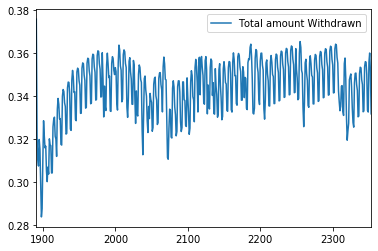

In [73]:
y_forecasted[["Total amount Withdrawn"]].plot()

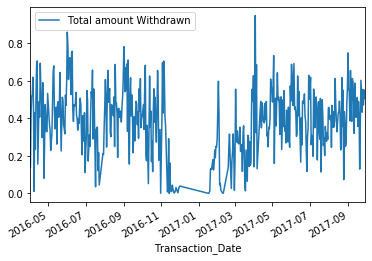

In [74]:
y_truth[["Total amount Withdrawn"]].plot()

## Save Model

In [ ]:
import pickle 

filename = 'ATM_VARMAX01.pkl'
pickle.dump(model_result, open(filename, 'wb'))

In [75]:
y_forecasted

,Total amount Withdrawn,Amount withdrawn XYZ Card
1891,0.375899,0.300352
1892,0.321413,0.247475
1893,0.310778,0.244224
1894,0.307488,0.255845
1895,0.319845,0.264036
...,...,...
2349,0.332645,0.286938
2350,0.355938,0.314959
2351,0.360155,0.317210
2352,0.351778,0.306629


In [76]:
y_try = y_forecasted

In [77]:
y_fact = y_truth

In [78]:
y_try.rename(columns={'Total amount Withdrawn':'Total amount Withdrawn_Predict'}, inplace=True)

In [79]:
y_truth

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,
2016-04-02,35.0,7.0,28.0,0.140080,0.015765,122000.0,0.333333,1.00,0.0,0.571429
2016-04-03,90.0,26.0,64.0,0.422292,0.307923,236900.0,0.500000,1.00,0.0,0.142857
2016-04-04,111.0,29.0,82.0,0.518847,0.258631,351000.0,0.166667,1.00,1.0,0.428571
2016-04-05,121.0,29.0,92.0,0.525867,0.277988,347800.0,0.833333,1.00,1.0,1.000000
2016-04-06,134.0,47.0,87.0,0.620261,0.566953,290400.0,1.000000,1.00,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
2017-09-25,122.0,41.0,81.0,0.554704,0.564758,230800.0,0.166667,1.00,1.0,0.428571
2017-09-26,131.0,36.0,95.0,0.472189,0.324686,274700.0,0.833333,1.00,1.0,1.000000
2017-09-27,130.0,40.0,90.0,0.551895,0.429056,296200.0,1.000000,1.00,1.0,1.000000


In [80]:
y_try.reset_index(drop=True, inplace=True)
y_fact.reset_index(drop=True, inplace=True)

In [81]:
y_combine = pd.concat( [y_fact, y_try], axis=1) 

In [82]:
y_combine.index=y_truth.index

In [83]:
y_combine

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn_Predict,Amount withdrawn XYZ Card
0,35.0,7.0,28.0,0.140080,0.015765,122000.0,0.333333,1.00,0.0,0.571429,0.375899,0.300352
1,90.0,26.0,64.0,0.422292,0.307923,236900.0,0.500000,1.00,0.0,0.142857,0.321413,0.247475
2,111.0,29.0,82.0,0.518847,0.258631,351000.0,0.166667,1.00,1.0,0.428571,0.310778,0.244224
3,121.0,29.0,92.0,0.525867,0.277988,347800.0,0.833333,1.00,1.0,1.000000,0.307488,0.255845
4,134.0,47.0,87.0,0.620261,0.566953,290400.0,1.000000,1.00,1.0,1.000000,0.319845,0.264036
...,...,...,...,...,...,...,...,...,...,...,...,...
458,122.0,41.0,81.0,0.554704,0.564758,230800.0,0.166667,1.00,1.0,0.428571,0.332645,0.286938
459,131.0,36.0,95.0,0.472189,0.324686,274700.0,0.833333,1.00,1.0,1.000000,0.355938,0.314959
460,130.0,40.0,90.0,0.551895,0.429056,296200.0,1.000000,1.00,1.0,1.000000,0.360155,0.317210
461,137.0,41.0,96.0,0.505886,0.442626,246800.0,0.666667,1.00,1.0,0.857143,0.351778,0.306629


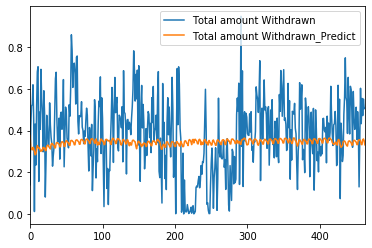

In [84]:
y_combine[['Total amount Withdrawn','Total amount Withdrawn_Predict']].plot()

In [85]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_truth["Total amount Withdrawn"], y_forecasted["Total amount Withdrawn_Predict"]))

print(rmse)

0.18349105099049245
